In [1]:
import pandas as pd

In [2]:
# Senolytic embedding dataset
embeddings_df = pd.read_csv('embeddings_chemGPT-4.7.csv', index_col=0)
embeddings_unlabelled_df= embeddings_df.drop(['senolytic'], axis=1)

In [3]:
embeddings_unlabelled_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.309650,-1.560161,-0.651346,0.426451,-2.568667,-2.610884,-2.254440,1.295848,3.212502,-0.704324,...,-0.663132,-0.108072,-0.459042,1.845068,-1.226921,0.085459,0.248546,0.561622,2.066449,-0.311512
1,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,-0.356269,-0.511717,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280
2,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,-0.356269,-0.511717,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280
3,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,-0.356269,-0.511717,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280
4,1.621928,-1.450368,-0.788752,1.183656,-2.469067,-2.302530,-2.381395,1.273349,3.017642,-1.237315,...,-1.605032,-0.182472,-1.019810,2.560509,-0.470129,-0.219511,0.016945,0.084042,1.794053,-0.137841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,-0.356269,-0.511717,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280
2519,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,-0.356269,-0.511717,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280
2520,1.072770,-2.403167,-1.185844,-1.044014,-2.329004,-2.959870,-1.232263,-0.445269,4.232524,-0.400370,...,-0.686947,-0.480384,0.712308,1.042747,-2.176943,-0.998865,-0.103628,0.194554,1.295081,-0.529213
2521,1.680551,-2.074332,-1.039890,-1.445241,-2.224915,-3.211641,-1.608723,-0.216098,4.049969,-0.366458,...,-0.647380,-0.217534,1.081191,0.683180,-2.533649,-1.064222,0.335169,0.249328,1.266632,-0.911273


## PCA

In [4]:
# Scale dataset https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_embeddings_df = std_scaler.fit_transform(embeddings_unlabelled_df)

In [5]:
scaled_embeddings_df

array([[ 0.56079159,  0.30335173,  0.64592992, ...,  1.5608641 ,
         1.91563304,  1.0900256 ],
       [-0.81984572, -0.65266102, -0.48076978, ...,  0.35277999,
        -0.68158259,  0.04957504],
       [-0.81984572, -0.65266102, -0.48076978, ...,  0.35277999,
        -0.68158259,  0.04957504],
       ...,
       [ 0.17123535, -0.63500052, -1.23643269, ...,  0.54415172,
         0.01850158,  0.50889329],
       [ 1.17074717, -0.2689734 , -0.72242114, ...,  0.69586679,
        -0.05146665, -0.51097973],
       [-0.81984572, -0.65266102, -0.48076978, ...,  0.35277999,
        -0.68158259,  0.04957504]])

In [12]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=6)
pca.fit(scaled_embeddings_df)
print(pca.explained_variance_ratio_)


[0.5594208  0.22049528 0.09031137 0.04360151 0.03194032 0.01746906]


In [13]:
pca.explained_variance_ratio_.sum()

0.9632383400737256

In [28]:

pca = PCA(n_components=len(scaled_embeddings_df[0]))
pca.fit(scaled_embeddings_df)
print(pca.explained_variance_ratio_)


[5.59420801e-01 2.20495277e-01 9.03113727e-02 4.36015066e-02
 3.19403227e-02 1.74690604e-02 1.03548243e-02 7.94913875e-03
 3.94815267e-03 2.94326256e-03 1.65897358e-03 1.31334874e-03
 1.22099459e-03 9.80558707e-04 8.66930698e-04 7.57236948e-04
 6.51884729e-04 5.04101949e-04 4.48298928e-04 3.56779744e-04
 3.30136633e-04 2.44485717e-04 2.34919338e-04 2.28764413e-04
 2.04324416e-04 1.68762399e-04 1.47535202e-04 1.21290002e-04
 9.36856729e-05 9.19144995e-05 8.19554530e-05 7.26707386e-05
 7.11706569e-05 6.82459010e-05 6.17786450e-05 5.20953299e-05
 4.47215482e-05 3.93140577e-05 3.59582617e-05 3.08181814e-05
 2.76350461e-05 2.72071019e-05 2.58421492e-05 2.37407975e-05
 2.21314221e-05 2.02969553e-05 1.78947532e-05 1.69233935e-05
 1.47358515e-05 1.29982074e-05 1.22777820e-05 1.10761208e-05
 1.08680450e-05 9.90067427e-06 8.81970284e-06 8.59736385e-06
 7.05143532e-06 6.77213235e-06 6.58828228e-06 6.53777138e-06
 5.96566354e-06 5.35267531e-06 4.89333549e-06 4.67514473e-06
 4.19390072e-06 3.872005

In [29]:
def how_many_features_explain_variance(n):
  for i in range(1,len(scaled_embeddings_df[0])+1):
    if pca.explained_variance_ratio_[0:i].sum() > n:
      return i


In [30]:
ninety_nine_variance = how_many_features_explain_variance(0.99)
print(str(ninety_nine_variance) + " features needed to explain 99% of the variance")

11 features needed to explain 99% of the variance


In [31]:
ninety_five_variance = how_many_features_explain_variance(0.95)
print(str(ninety_five_variance) + " features needed to explain 95% of the variance")

6 features needed to explain 95% of the variance


In [32]:
ninety_variance = how_many_features_explain_variance(0.9)
print(str(ninety_variance) + " features needed to explain 90% of the variance")

4 features needed to explain 90% of the variance


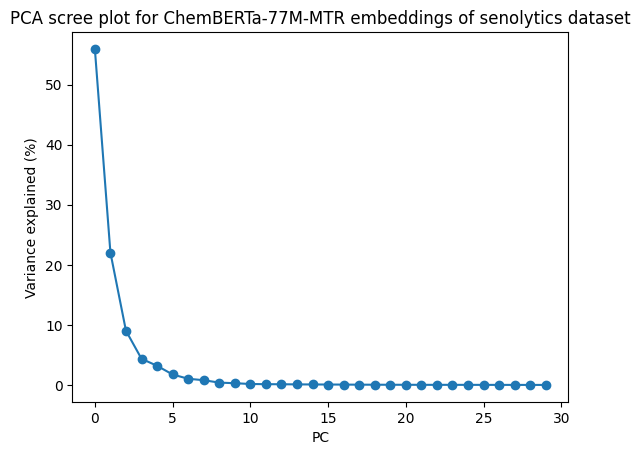

In [15]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_[0:30]*100,  marker='o')
plt.title("PCA scree plot for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC")
plt.ylabel("Variance explained (%)")
plt.show()

In [19]:
# left of elbow: 4 of 128 features explains this amount of data (elbow)
pca.explained_variance_ratio_[0:4].sum()

0.9138289570306496

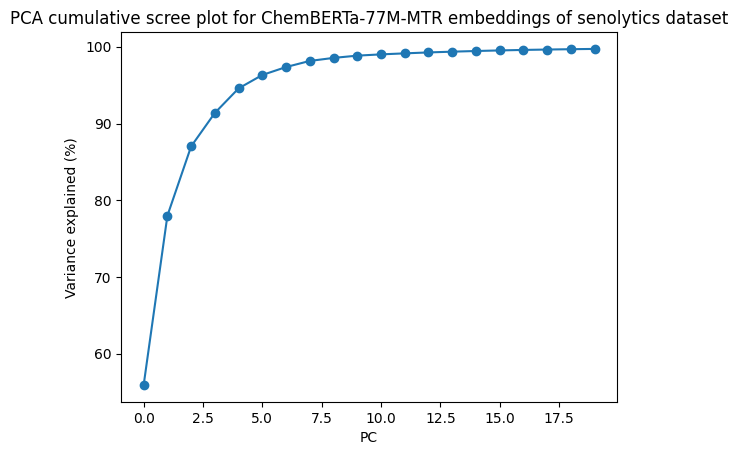

In [22]:
# Cumulative plot
variance = np.cumsum(pca.explained_variance_ratio_)
# https://statisticallyrelevant.com/principal-component-analysis-in-python/

plt.plot(variance[0:20]*100,  marker='o')
plt.title("PCA cumulative scree plot for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC")
plt.ylabel("Variance explained (%)")
plt.show()

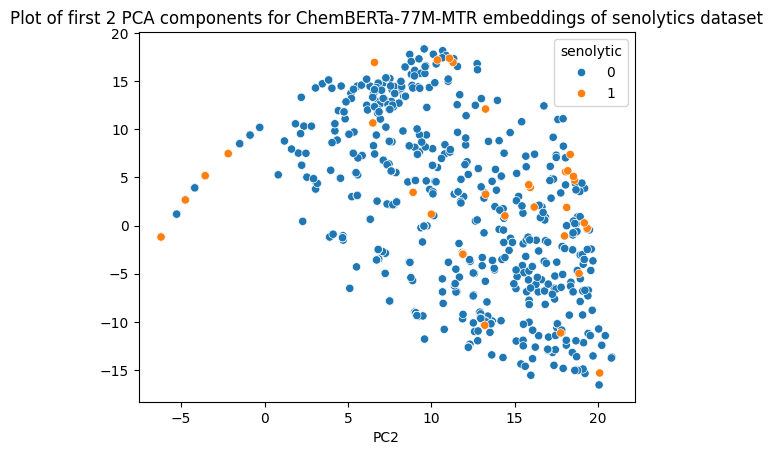

In [23]:
# Plot data
import seaborn as sns
pca = PCA(n_components=2)
pca.fit(scaled_embeddings_df)
pca_transformed_embeddings = pca.transform(scaled_embeddings_df)


sns.scatterplot(x=pca_transformed_embeddings[:,0], y=pca_transformed_embeddings[:,1], hue=embeddings_df['senolytic'])

#plt.scatter(pca_transformed_embeddings[:,0], pca_transformed_embeddings[:,1])
plt.title("Plot of first 2 PCA components for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

In [34]:
# Investigate distribution of different types of senolytics
senolytic_types_df = pd.read_csv('positive_senolytics_class.csv')#, index_col=0)
senolytic_types_df

,Name,SMILES_no_salt,Compound_type
0,Azacyclonol,C(c1ccccc1)(c1ccccc1)(C1CCNCC1)O,unknown
1,Cyclosporin A,N1(C([C@@H](N(C([C@@H](N(C([C@@H](N(C([C@H](NC...,unknown
2,Digoxin,[C@]12([C@@]([C@@H](\C\3=C\C(OC3)=O)CC1)([C@@H...,Cardiac glycoside
3,Nitrofural,c1([N+]([O-])=O)oc(cc1)\C=N\NC(=O)N,unknown
4,Roxithromycin,[C@]1([C@@H]([C@H](C[C@H](O1)C)N(C)C)O)(O[C@@H...,unknown
5,Luteolin,c12C(\C=C(/Oc1cc(cc2O)O)\c1cc(c(cc1)O)O)=O,Flavonoid
6,Enoxacin,C=1(/C(c2c(nc(c(c2)F)N2CCNCC2)N(\C1)CC)=O)\C(=O)O,unknown
7,Atorvastatin,c1(c(n(c(c1c1ccccc1)c1ccc(cc1)F)CC[C@H](C[C@H]...,unknown
8,Azithromycin,[C@@H]1([C@@H]([C@H](C[C@H](O1)C)N(C)C)O)O[C@@...,unknown
9,Nitazoxanide,c1(sc(NC(c2c(OC(=O)C)cccc2)=O)nc1)[N+]([O-])=O,unknown


In [35]:
embeddings_df['senolytic_type'] = pd.Series([0 for i in range(len(embeddings_df)-len(senolytic_types_df))]+ list(senolytic_types_df['Compound_type']))

In [36]:
embeddings_df.tail(60)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,senolytic,senolytic_type
2463,1.621508,-1.452015,-0.776116,1.273191,-2.378326,-2.292570,-2.294989,1.277588,3.065932,-1.215107,...,-1.059451,2.572157,-0.536452,-0.256242,-0.044217,0.044685,1.822588,-0.084957,0,0
2464,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280,0,0
2465,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280,1,unknown
2466,1.465341,0.463142,-0.504756,-1.075069,-1.891386,-3.407306,-2.656537,0.270701,2.348987,-0.306419,...,1.595500,-0.076916,-0.895624,-1.542264,1.375787,-0.299109,0.999314,-2.166570,1,unknown
2467,1.736021,1.035085,-0.313511,-0.076104,-1.470981,-3.307666,-3.121178,0.659192,1.160949,-0.657256,...,1.041855,0.055840,0.039369,-1.548656,1.394507,-1.046977,1.323551,-2.349097,1,Cardiac glycoside
2468,1.600209,-1.101875,-0.531457,0.721878,-2.393021,-2.753195,-2.488750,1.418994,2.979029,-0.953894,...,-0.452640,1.984063,-0.758279,0.001296,0.529834,0.265049,2.230398,-0.359314,1,unknown
2469,1.645792,0.641065,0.014113,-0.035731,-1.460051,-3.425348,-3.358609,0.948706,1.281845,-0.530163,...,0.960802,0.245196,-0.188968,-1.666838,1.218907,-0.997373,1.293318,-2.358148,1,unknown
2470,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280,1,Flavonoid
2471,0.470115,-2.419033,-0.971273,-0.517662,-2.599303,-2.720514,-0.855294,-1.007702,4.465175,-0.594596,...,0.500321,1.305023,-1.624043,-1.220565,-0.166776,0.125462,1.010428,-0.701280,1,unknown
2472,1.441216,-2.316360,-1.163198,-1.307646,-2.284447,-3.099921,-1.444424,-0.285059,4.154043,-0.364447,...,0.903165,0.877349,-2.486627,-0.975121,0.098106,0.239878,1.308041,-0.704862,1,unknown


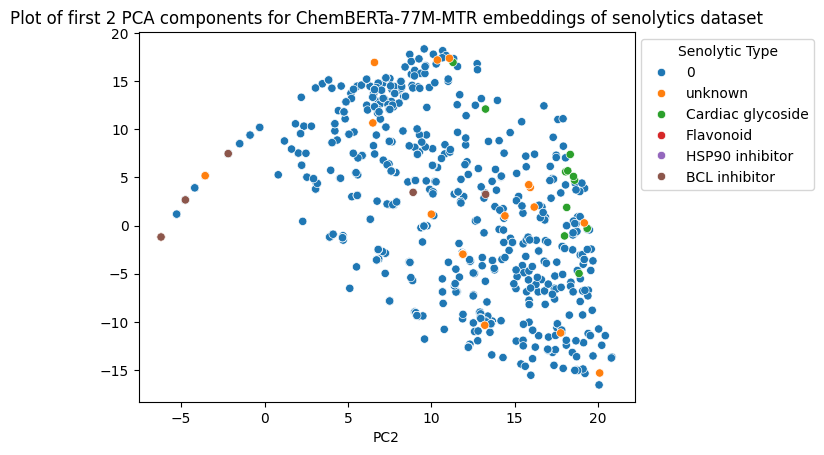

In [37]:
# Plot data

import seaborn as sns
pca = PCA(n_components=2)
pca.fit(scaled_embeddings_df)
pca_transformed_embeddings = pca.transform(scaled_embeddings_df)


sns.scatterplot(x=pca_transformed_embeddings[:,0], y=pca_transformed_embeddings[:,1], hue=embeddings_df['senolytic_type'])
plt.legend(bbox_to_anchor=(1, 1), title="Senolytic Type")

#plt.scatter(pca_transformed_embeddings[:,0], pca_transformed_embeddings[:,1])
plt.title("Plot of first 2 PCA components for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

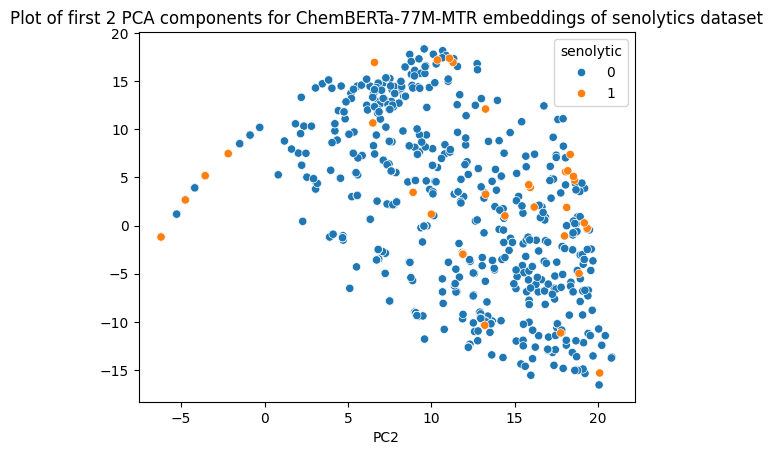

In [23]:
# Plot data
import seaborn as sns
pca = PCA(n_components=2)
pca.fit(scaled_embeddings_df)
pca_transformed_embeddings = pca.transform(scaled_embeddings_df)


sns.scatterplot(x=pca_transformed_embeddings[:,0], y=pca_transformed_embeddings[:,1], hue=embeddings_df['senolytic'])

#plt.scatter(pca_transformed_embeddings[:,0], pca_transformed_embeddings[:,1])
plt.title("Plot of first 2 PCA components for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

### UMAP

In [41]:

#!pip install umap-learn

import umap.umap_ as umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(scaled_embeddings_df)
embedding.shape




(2523, 2)

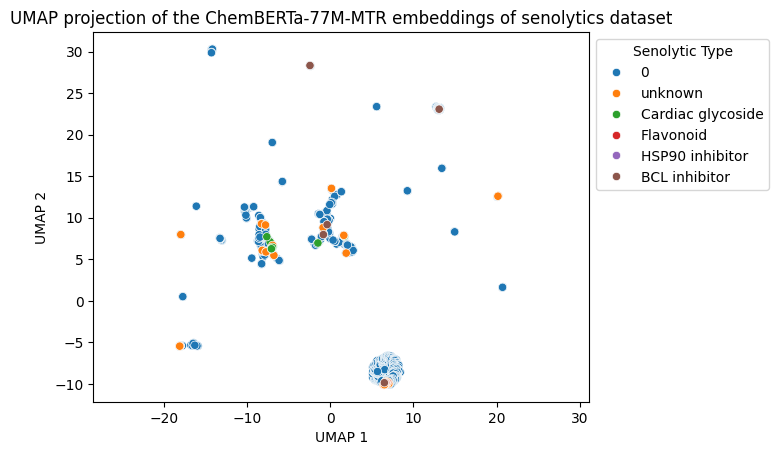

In [42]:
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=embeddings_df['senolytic_type'])#c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor=(1, 1), title="Senolytic Type")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title('UMAP projection of the ChemBERTa-77M-MTR embeddings of senolytics dataset');

# BELOW IS LEFT OVER CODE FROM OTHER MODEL!!

In [ ]:
# Choose 52 to explain 90% variance
pca = PCA(n_components=52)
pca.fit(scaled_embeddings_df)
pca_transformed_embeddings = pca.transform(scaled_embeddings_df)
pca_transformed_embeddings

array([[  4.18448074,   6.70183444,   3.97279092, ...,  -0.42130614,
         -0.45737664,  -0.215192  ],
       [  2.68712471,   3.98162858,   0.30938865, ...,   1.17535669,
          0.70977673,   0.37867127],
       [  1.65507412,  15.13123803,   1.93179756, ...,   0.63013056,
          0.693397  ,   0.30150692],
       ...,
       [ 20.88445995,  -7.83010165, -13.57615875, ...,  -2.52845734,
         -1.68613783,   2.41567427],
       [ 17.13447879,  -1.57634882,  -8.3962412 , ...,  -0.15474382,
          0.84295977,  -1.45809816],
       [ 14.84866523,  -1.96492954,  -9.34038533, ...,  -2.30182109,
         -0.98783408,  -1.53668933]])

In [ ]:
pca_transformed_embeddings_df = pd.DataFrame(pca_transformed_embeddings)
pca_transformed_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,4.184481,6.701834,3.972791,-7.931931,1.204368,2.685703,0.415779,1.454484,-1.409162,1.224703,...,-0.182192,0.517955,-0.565866,0.010158,0.896658,0.424820,-1.265472,-0.421306,-0.457377,-0.215192
1,2.687125,3.981629,0.309389,-8.787266,7.461270,0.470253,-2.620183,0.162801,-2.658939,-4.703126,...,-2.773765,-3.269509,-2.406397,-1.536597,0.965217,1.478966,0.620433,1.175357,0.709777,0.378671
2,1.655074,15.131238,1.931798,1.060965,2.790545,-1.830201,2.340536,2.659475,-4.869401,2.860517,...,0.372916,1.019819,-0.833802,0.225208,-0.421733,1.053584,-0.631845,0.630131,0.693397,0.301507
3,1.686809,-7.277621,1.869668,-6.925907,1.518951,1.332903,1.977778,-1.560953,-7.758262,-2.962261,...,-0.335822,0.688395,-0.571124,-0.919215,-1.202824,-0.611707,-0.109249,0.036952,0.247597,1.405690
4,6.699373,-5.107465,10.940938,-0.297832,5.955676,-6.428809,13.952084,-7.900451,7.820023,-0.937135,...,-0.903090,1.386645,-0.194164,-1.412748,-1.389199,-0.155710,-1.404926,-3.407124,3.816752,-0.313709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,8.188425,-2.353043,-7.379499,5.112264,0.793266,-5.841407,-0.420128,1.980038,1.566482,3.444219,...,-0.169433,0.666308,0.672032,0.194354,0.109333,1.343855,-0.479735,-0.163573,1.135850,-1.823640
2519,2.321168,-12.688175,-5.656679,3.607345,-1.658469,2.368440,4.468992,0.489902,-3.856958,-4.770536,...,0.639255,-1.656219,-1.509138,-0.995929,-1.491969,-0.688649,-0.074657,-1.600442,-0.305098,0.852326
2520,20.884460,-7.830102,-13.576159,1.274053,3.416450,-4.702599,6.242463,-1.094841,3.503904,-0.026399,...,0.271118,0.657674,-0.036272,-2.985154,0.824557,0.977563,1.751332,-2.528457,-1.686138,2.415674
2521,17.134479,-1.576349,-8.396241,0.656804,-1.098776,8.493051,0.137253,-6.371421,5.251926,-1.614952,...,0.265390,-2.079084,1.084889,-1.535601,4.326326,0.482047,0.921905,-0.154744,0.842960,-1.458098


In [ ]:
X = pca_transformed_embeddings_df
y = embeddings_df['senolytic']


In [ ]:
# Shuffle dataset
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [ ]:
y

1356    0
1118    0
1352    0
1176    0
489     0
       ..
1862    0
124     0
2331    0
890     0
264     0
Name: senolytic, Length: 2523, dtype: int64

## Classifiers

### Random Forest

In [ ]:
# Random forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# CPSC 330W2 UBC Homework 5: Evaluation metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    cross_val_predict,
)

rf = RandomForestClassifier(max_depth=5, random_state=42, class_weight="balanced")

# cv = 4 should give stratified
scores_rf = cross_validate(rf, X, y, scoring = ["accuracy", "precision", "recall", "f1"], return_train_score=True, cv=4)
pd.DataFrame(scores_rf)



,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.050575,0.030285,0.980983,0.999471,1.0,1.000000,0.142857,0.977273,0.250,0.988506
1,1.349802,0.083121,0.977813,0.996829,1.0,0.974359,0.066667,0.883721,0.125,0.926829
2,0.789545,0.017183,0.977813,0.998414,1.0,1.000000,0.066667,0.930233,0.125,0.963855
3,0.673245,0.017466,0.976190,0.996830,0.0,0.931818,0.000000,0.931818,0.000,0.931818


In [ ]:
pd.DataFrame(scores_rf).mean()

fit_time           0.965792
score_time         0.037014
test_accuracy      0.978200
train_accuracy     0.997886
test_precision     0.750000
train_precision    0.976544
test_recall        0.069048
train_recall       0.930761
test_f1            0.125000
train_f1           0.952752
dtype: float64

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
# What optimisation scoring? Accuracy and precision both give just 0 for every test example but don't want too many false positives
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline


cross_val = StratifiedKFold(n_splits=4)

pipe_rf = make_pipeline(RandomForestClassifier(random_state=42, class_weight="balanced"))

param_dist = {
    "randomforestclassifier__n_estimators": [1, 10, 50, 100, 1000],
    "randomforestclassifier__criterion": ['gini', 'entropy', 'log_loss'],
    "randomforestclassifier__max_depth": [None, 1, 10, 100],
    "randomforestclassifier__max_features": [None, "log2", "sqrt"],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 5, 10],
}
random_search = RandomizedSearchCV(
    pipe_rf, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search.fit(X, y)
random_search.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'randomforestclassifier__n_estimators': 1000,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__min_samples_leaf': 10,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__criterion': 'log_loss'}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_rf = {}
for key, value in random_search.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_rf[key[len("randomforestclassifier__"):]] = value

best_params_rf

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'log_loss'}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 0.9762376237623762
Precision: 0.0
Recall: 0.0
F1: 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


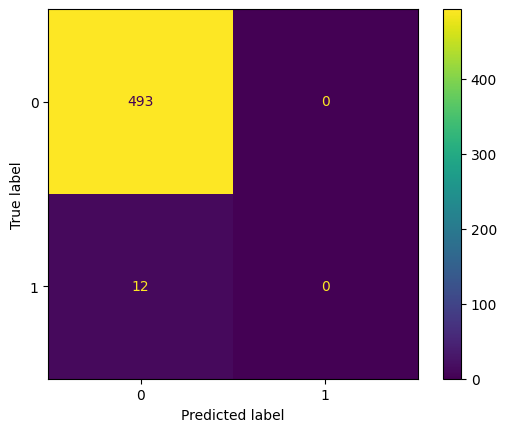

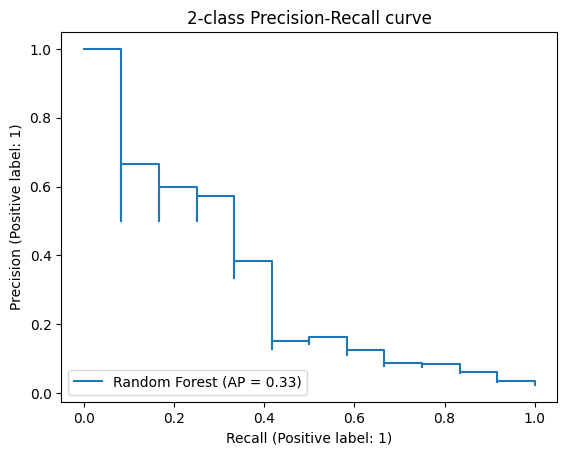

In [ ]:
# Retrain model
# https://medium.com/analytics-vidhya/optimize-hyperparameters-with-gridsearch-d351b0fd339d

rf_best = RandomForestClassifier(random_state=42, class_weight="balanced", **best_params_rf)

rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    rf_best, X_test, y_test, name="Random Forest",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")



In [ ]:
# Dataset imbalance
print("Senolytics " + str(round(sum(y)/len(X)*100, 2)) + "% of the dataset")

Senolytics 2.3% of the dataset


### KNN

In [ ]:
# KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


cross_val = StratifiedKFold(n_splits=4)

pipe_knn = make_pipeline(KNeighborsClassifier())

param_dist = {
    "kneighborsclassifier__n_neighbors": [2, 5, 10],
    "kneighborsclassifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "kneighborsclassifier__weights": ['uniform', 'distance'],
}

random_search_knn = RandomizedSearchCV(
    pipe_knn, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search_knn.fit(X, y)
random_search_knn.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'kneighborsclassifier__weights': 'distance',
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__algorithm': 'brute'}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_knn = {}
for key, value in random_search_knn.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_knn[key[len("kneighborsclassifier__"):]] = value

best_params_knn

{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}

Accuracy: 0.9821782178217822
Precision: 0.8
Recall: 0.3333333333333333
F1: 0.47058823529411764




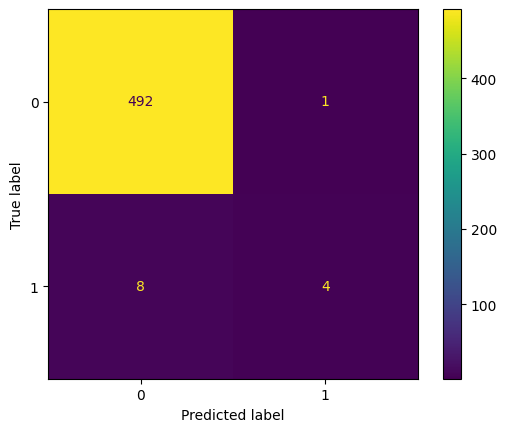

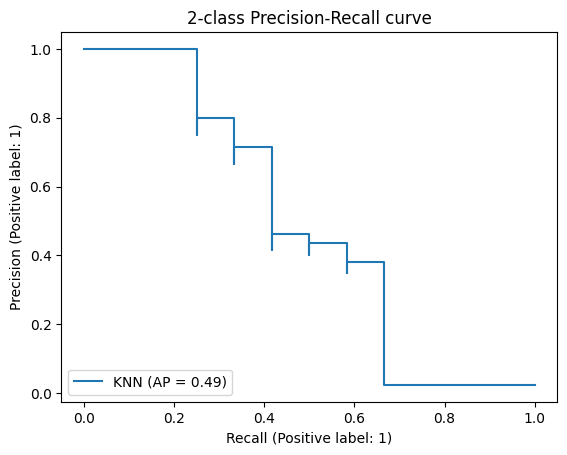

In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


knn_best = KNeighborsClassifier(**best_params_knn)

knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    knn_best, X_test, y_test, name="KNN",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### SVC

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
from sklearn.svm import SVC

cross_val = StratifiedKFold(n_splits=4)

pipe_svc = make_pipeline(SVC(random_state=42, class_weight='balanced'))

param_dist = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__kernel": ['linear', 'poly', 'rbf',]
}

random_search_svc = RandomizedSearchCV(
    pipe_svc, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search_svc.fit(X, y)
random_search_svc.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'svc__kernel': 'poly', 'svc__gamma': 1, 'svc__C': 100}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_svc= {}
for key, value in random_search_svc.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_svc[key[len("svc__"):]] = value

best_params_svc

{'kernel': 'poly', 'gamma': 1, 'C': 100}

Accuracy: 0.9564356435643564
Precision: 0.25
Recall: 0.4166666666666667
F1: 0.3125




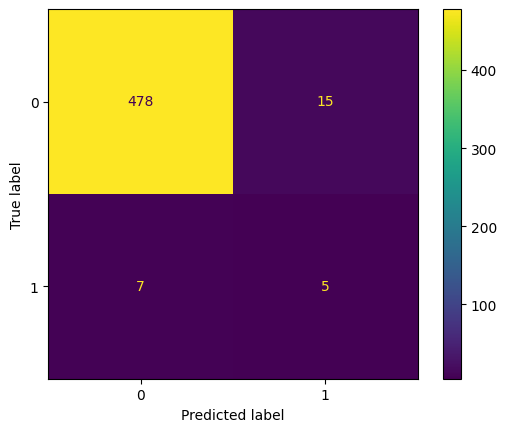

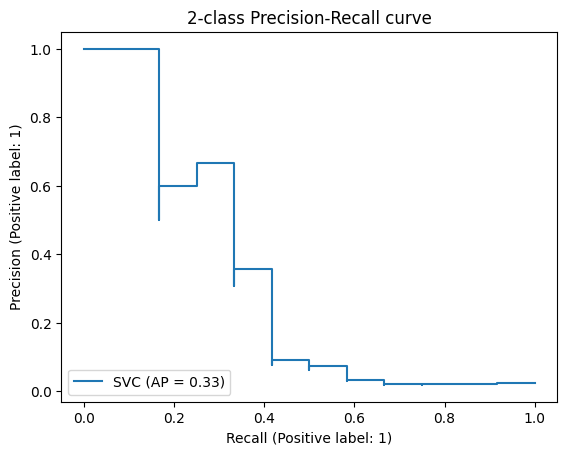

In [ ]:
svc_best = SVC(random_state=42, class_weight='balanced', **best_params_svc)

svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    svc_best, X_test, y_test, name="SVC",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### XGBoost

In [ ]:
# Code: Code from paper Senolytics prediction code: https://zenodo.org/record/7870357
# https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73
import xgboost as xgb

cross_val = StratifiedKFold(n_splits=4)

pipe_xgb = make_pipeline(xgb.XGBClassifier(random_state=42, class_weight='balanced'))

param_dist = {
    'xgbclassifier__learning_rate': [0.05, 0.10, 0.3, 0.5, 0.75, 1],
    'xgbclassifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'xgbclassifier__max_depth': [3, 5, 10, 20],
    'xgbclassifier__min_child_weight': [1, 3, 8, 15],
    'xgbclassifier__colsample_bytree': [0.1, 0.5, 0.9]
}

random_search_xgb = RandomizedSearchCV(
    pipe_xgb, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search_xgb.fit(X, y)
random_search_xgb.best_params_


Fitting 4 folds for each of 10 candidates, totalling 40 fits
[14:22:36] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



{'xgbclassifier__min_child_weight': 3,
 'xgbclassifier__max_depth': 20,
 'xgbclassifier__learning_rate': 0.3,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__colsample_bytree': 0.9}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_xgb= {}
for key, value in random_search_xgb.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_xgb[key[len("xgbclassifier__"):]] = value

best_params_xgb

{'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

[14:44:36] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Accuracy: 0.9782178217821782
Precision: 1.0
Recall: 0.08333333333333333
F1: 0.15384615384615385




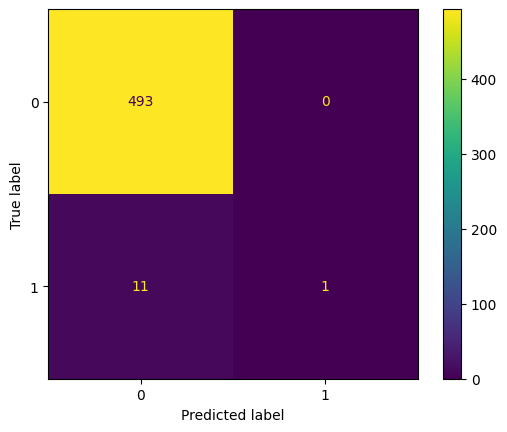

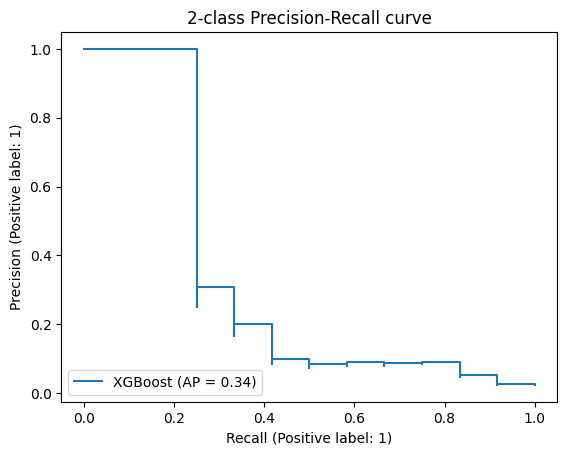

In [ ]:
xgb_best = xgb.XGBClassifier(random_state=42, class_weight='balanced', **best_params_xgb)

xgb_best.fit(X_train, y_train)
y_pred = xgb_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    xgb_best, X_test, y_test, name="XGBoost",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")